# 实验2 
## 算法2中文描述. 区间划分
### 已知: n个课程，课程 j 的开始时间为 sj 结束时间为fj.
### 目标: 使用尽量少的教室，调度所有课堂，使任何两个课会在教室和时间上有冲突
### 样例: 
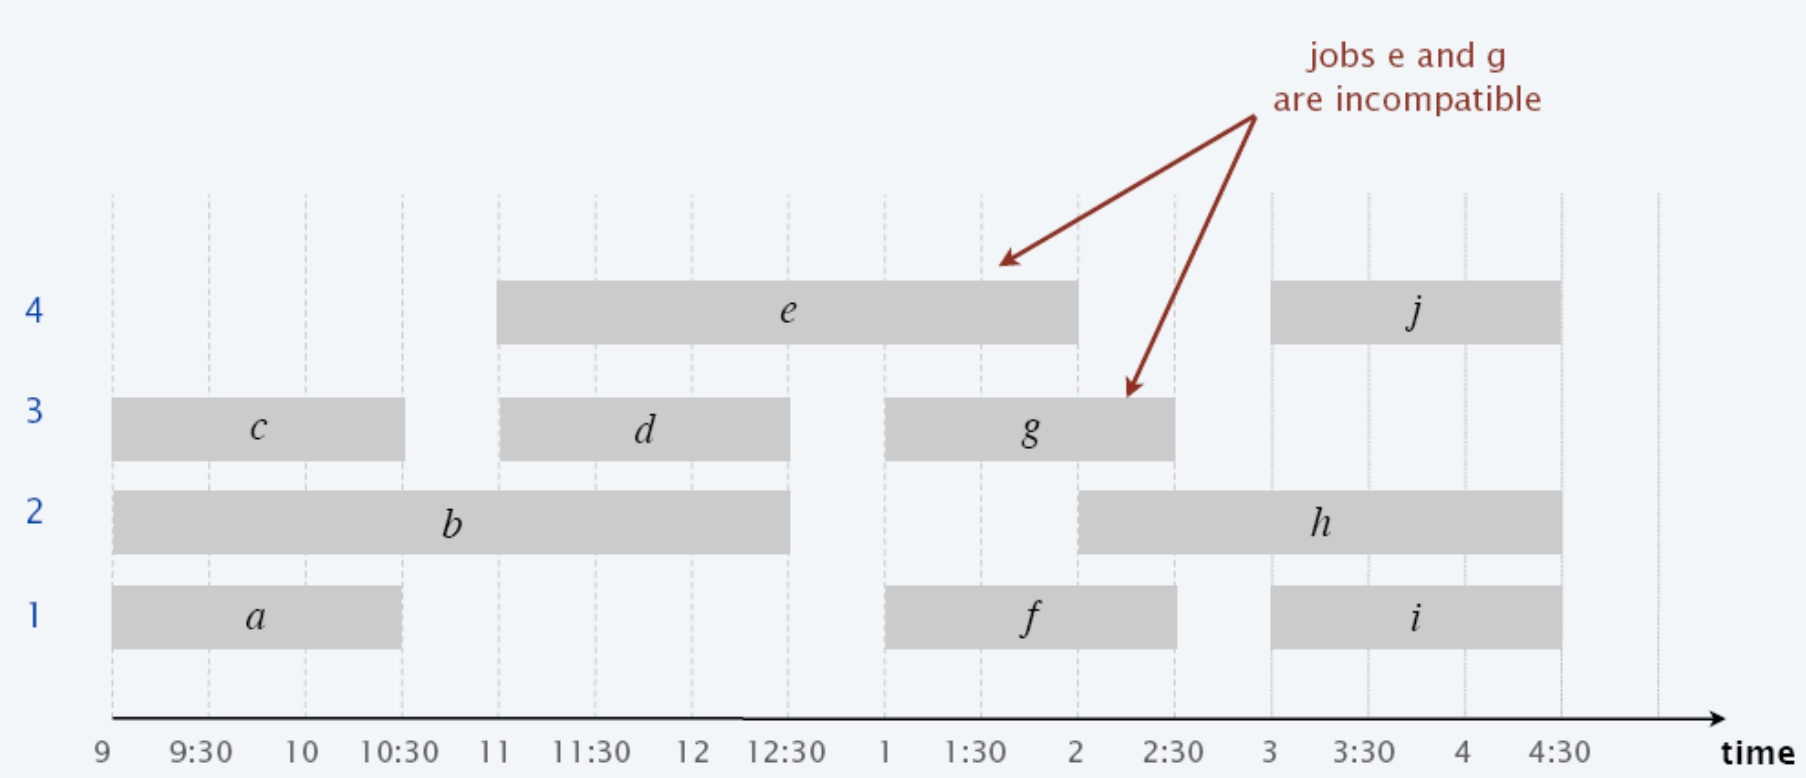
### 要求:
    给出新算法的描述
    编写该算法的程序 用上例+自行设计测试数据测试程序，输出测试结果。
### 题目分析：
    1.这个问题的最优解一定存在，但却不唯一。
    考虑到两个区间的开始和结束时间可以完全一样。在一个最优解里面交换他们的位置仍旧是一个最优解。即便是所有区间都不相同，仍旧可能存在多个最优解。考虑区间[1,2],[3,5],[4,6]存在两个最优解。
    2.一种思路：把最早开始的第一个节点放到第一个教室，打上tag1。
    然后再从剩下的区间中抽最早的。对于已经占用的教室，若不冲突，即他的头部不早于该教室最后一个区间的尾部，则插入。若遍历所有没有找到，则插入新的教室。依次执行。
    这样做的好处是，按照时间顺序依次考虑了每一个区间，避免先插入了一个稀疏的区间后导致其他更加紧凑的区间不能插入。
    如下：
    --- --- ---
    - ------- -
    如果第一行的第二个区间插入到了第二行的第一个后面，将导致更加紧凑的第二行第二个区间不能插入，且与第一行第一个区间也冲突，从而不得不使用3行。
    3.进一步思考：在整个时间段上，某一时刻冲突的区间的个数的最大值是否就是所需要的区间的个数？
    我思考了一会，答案是 yes
    首先，假设最优解需要n个教室，某一时刻冲突的区间的个数的最大值为m。则显然n>=m。
    其次，我们可以仍旧用上述算法进行一次。一开始选定一个最早的区间，随后开始填充。我们假设有n个教室并且尽量使用前m个教室。由于按照开始时间顺序来，每一个区间开始的时刻最多有m-1个区间与其冲突，因此总可以在这m个教室中找到一个教室填入。由于按照顺序填，因此不用考虑之后与自己冲突的区间，而只考虑开始的时刻与自己冲突的。依次进行可以只使用m个教室完成任务。从而我们找到了一个解n*=m 而最优解n>=m 因此n*<=n 从而该方法得到的解是最优解。

In [1]:
a = [[2,3],[1,5],[3,5],[2,4],[4,5]]

In [2]:
def IntervalPartitioning(list_class):
    "Interval Partitioning 区间划分算法"
#     input list_class=[class1,class2,class3...classn]
#     class = [begin , end]
#     sort input
    list_class.sort(key = lambda x : x[0])
#     every element means a classroom was used. And the element means the tail of this used classroom's last class
    list_classroom = [0]
    list_result = [-1]*len(list_class)
    for i in range(len(list_class)):
        for j in range(len(list_classroom)):
            if list_classroom[j] <= list_class[i][0] :
                list_classroom[j]=list_class[i][1]
                list_result[i]=j
                break
        if list_result[i]== -1 :
#             not found old classroom to get in,then creat a new classroom for i
            list_classroom.append(list_class[i][1])
            list_result[i]=len(list_classroom)-1
    return list_result

In [3]:
IntervalPartitioning(a)

由此可见 结果正确

### 复杂度分析：
    排序开销为O(n*logn),而每一轮的开销是O(M+1)  (M=最多使用的教室)
    因此总共O(n*M+n*logn)
    最好的情况为O(n*logn)
    由于M最差为n 因此最坏的情况为O(n^2)

### 生成自动测试样例

In [4]:
import time
import random
import numpy as np
import math
import matplotlib.pyplot as plt
def gentest(num,max_classroom):
    a=list(range(8*num))
    b=[random.sample(a,2*num) for i in range(max_classroom)]
    res=np.zeros((max_classroom,num,2),dtype=int).tolist()
#     千万不可以使用list_a*num的方式制作高阶list 它是浅拷贝！！
    for i in range(max_classroom):
        for j in range(2*num):
            res[i][j//2][j%2]=b[i][j]
    for x in res:
        random.shuffle(x)
    return np.array(res).reshape(num*max_classroom,2).tolist()

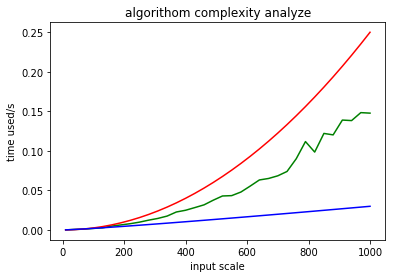

In [5]:
num_scale = np.linspace(10,1000,34,dtype=int)
max_scale = 4
time_res = np.zeros(np.size(num_scale),dtype=float)
for i in range(np.size(num_scale)):
    input_temp = gentest(num_scale[i],max_scale)
#     print(input_temp)
    start=time.time()
    IntervalPartitioning(input_temp)
    end=time.time()
    time_res[i]=end-start
x=num_scale
y=time_res
plt.plot(x,y,'g',x,0.00000025*x*x,'r',x,0.000003*x*np.log2(x),'b')
plt.xlabel('input scale')
plt.ylabel('time used/s')
plt.title('algorithom complexity analyze')
plt.show()

### 测试结果
可见该算法的复杂度为O(n^2)